In [1]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf


In [2]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

In [3]:
from keras.preprocessing import image
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
formulas_df = pd.read_csv('/Users/alyona_dushkina/train_final.csv')

In [5]:
import pandas as pd
import numpy as np
import pickle
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

In [6]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [7]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,255,243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.random.seed(1212)

In [9]:
labels=np.array(labels)


In [10]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=14)

In [11]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,255,243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
l=[]
for i in range(9156):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [14]:
np.random.seed(7)


In [15]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1 , 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(14, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Metal device set to: Apple M1


In [16]:
from keras.models import model_from_json


In [17]:
# Обучение модели
history = model.fit(np.array(l), cat, epochs=10, batch_size=20, shuffle=True, verbose=1)



Epoch 1/10


2024-02-23 09:55:48.441536: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


458/458 [==============================] - 13s 27ms/step - loss: 2.5552 - accuracy: 0.4581
Epoch 2/10
458/458 [==============================] - 12s 27ms/step - loss: 0.6892 - accuracy: 0.7718
Epoch 3/10
458/458 [==============================] - 12s 27ms/step - loss: 0.4477 - accuracy: 0.8493
Epoch 4/10
458/458 [==============================] - 13s 27ms/step - loss: 0.3442 - accuracy: 0.8800
Epoch 5/10
458/458 [==============================] - 13s 27ms/step - loss: 0.2818 - accuracy: 0.9012
Epoch 6/10
458/458 [==============================] - 12s 27ms/step - loss: 0.2489 - accuracy: 0.9131
Epoch 7/10
458/458 [==============================] - 12s 27ms/step - loss: 0.2180 - accuracy: 0.9207
Epoch 8/10
458/458 [==============================] - 12s 27ms/step - loss: 0.2179 - accuracy: 0.9217
Epoch 9/10
458/458 [==============================] - 12s 27ms/step - loss: 0.1981 - accuracy: 0.9268
Epoch 10/10
458/458 [==============================] - 13s 28ms/step - loss: 0.1790 - accurac

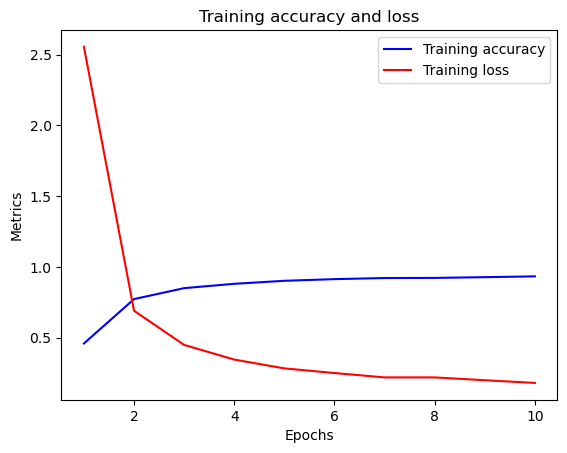

In [18]:
import matplotlib.pyplot as plt

# Getting precision and loss values from training history
accuracy = history.history['accuracy']
loss = history.history['loss']

# Getting the number of epochs
epochs = range(1, len(accuracy) + 1)

# Visualize accuracy and loss in one graph
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [22]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 24, 24)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 12, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 10, 10)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 5, 5)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 5, 5)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

In [20]:
from sklearn.metrics import classification_report

In [21]:
# Get predictions of class probabilities
y_pred_prob = model.predict(np.array(l))
# Convert probabilities into class labels (indices of the classes with the highest probabilities)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the classification using the classification report
print(classification_report(labels, y_pred))



287/287 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       654
           1       0.97      0.98      0.97       654
           2       0.99      0.98      0.98       654
           3       1.00      0.99      0.99       654
           4       0.97      0.98      0.98       654
           5       0.98      0.99      0.99       654
           6       0.99      1.00      1.00       654
           7       0.98      0.99      0.98       654
           8       1.00      0.99      1.00       654
           9       1.00      0.99      0.99       654
          10       0.70      0.98      0.82       654
          11       0.99      0.98      0.99       654
          12       0.97      0.75      0.85       654
          13       0.99      0.81      0.89       654

    accuracy                           0.96      9156
   macro avg       0.97      0.96      0.96      9156
weighted avg       0.97  